# Scientific Programming in Python (SPiP) - Mathplot Exercise 5.1

by [Michael Granitzer (michael.granitzer@uni-passau.de)](http://www.mendeley.com/profiles/michael-granitzer/) 

   
__License__

This work is licensed under a [Creative Commons Attribution 3.0 Unported License](http://creativecommons.org/licenses/by/3.0/)

# Overview

The aim of this exercise is to practice the use of mathplotlib for plotting multivariate data in various subplots. We will use the well known Iris Data Set, which is introduced next.

# The Iris Data Set

The [Iris data set](http://archive.ics.uci.edu/ml/datasets/Iris) (often also called Fishers Iris Data) is a well known data set in data mining. The data set consists of 50 samples from each of three species of the Iris flowwer (Iris setosa, Iris virginica and Iris versicolor). For every flower four measures have been taken: the length and the width of the sepals and petals measured in centimetres (see also http://en.wikipedia.org/wiki/Iris_flower_data_set)

In [5]:
#Code for loading and importing the iris data set
iris = np.loadtxt('data/iris.csv', delimiter=',')
# data: (observations x attributes) matrix, classes: classes (1: setosa, 2: versicolor, 3: virginica)
data, classes = iris[:, :4], iris[:, 4].astype(np.int) 

## Exercise 5.1-a: Visualisation of the Iris Data Set

* First load the data set with the above code.
* Create a single histogram-plot for every dimension using matplotlib
* Create a 4x4 plot containing the four histograms side by side
* Create a single histogram-plot containing all dimensions
* Create a boxplot over the four dimensions
* Implement a function that creates a scatter plot matrix, where the main diagonal are either boxplots or histograms and classes.
* Encode the class information with different colors in the scatter plot matrix

In all visualisations above take care off apropriate labelling of axis and a apropriate titles of figures. If you created the most basic form of the above visualisations, try to change the appearance for easier identifying patterns.

Also, try to answer the following questions:

* What does the distribution of an attribute look like? Are the attribute values reasonable?
* Which of the above presentations of histograms allows you to easier compare the distributions of the different attributes?
* Which attributes seem to be most discriminative to differentiate the different flowers?


# Solutions


## Solution 5.1-  Visualisation of the Iris Data Set

**1. Create a single histogram-plot for every dimension using mathplotlib**

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

#to make life easier lets define a helper function
def plotHistogramm(x,htitle,num_bins=50):
    plt.figure() #create a new figure
    # the histogram of the data
    n, bins, patches = plt.hist(x, num_bins, density=0, facecolor='green', alpha=0.5)
    plt.title(htitle)
    plt.show()

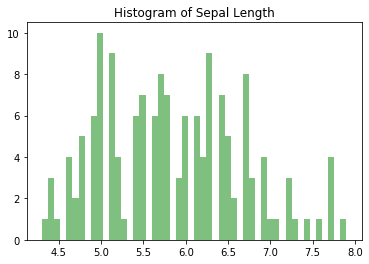

In [11]:
plotHistogramm(data[:,0],"Histogram of Sepal Length")

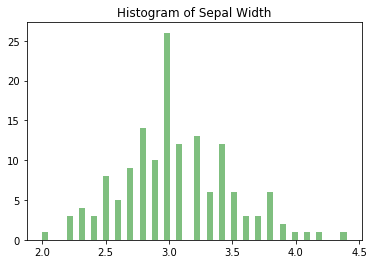

In [12]:
plotHistogramm(data[:,1],"Histogram of Sepal Width")

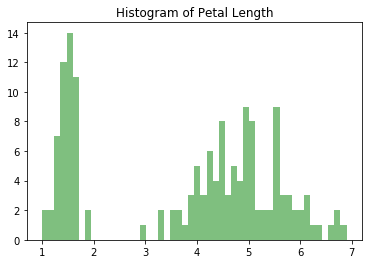

In [13]:
plotHistogramm(data[:,2],"Histogram of Petal Length")

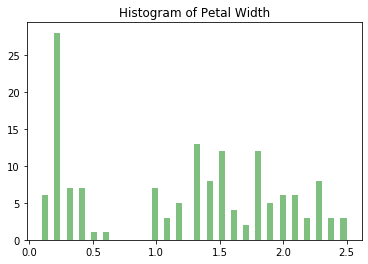

In [14]:
plotHistogramm(data[:,3],"Histogram of Petal Width")

**2.  Create a 4x4 plot containing the four histograms side by side**

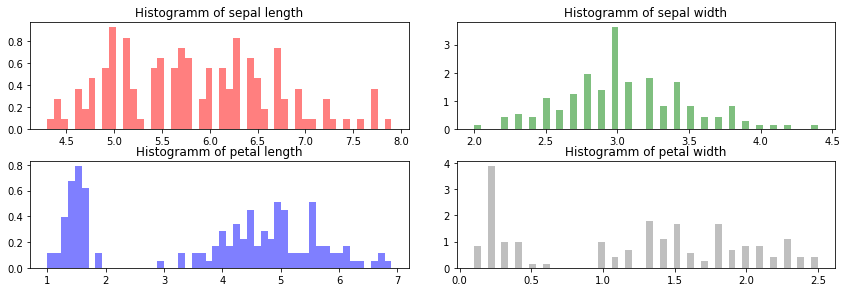

In [16]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,4))
fig.tight_layout()

names=["sepal length","sepal width", "petal length", "petal width"]
colors=["red","green","blue","grey"]

num_bins=50
for row in range(len(axes)):
    for col in range(len(axes[row])):
        idx=row*(len(axes[row]))+col
        n, bins, patches = axes[row,col].hist(data[:,idx], num_bins, density=1, facecolor=colors[idx], alpha=0.5)
        axes[row,col].set_title("Histogramm of %s"%(names[idx]))


**3.  Create a single histogram-plot containing all dimensions**

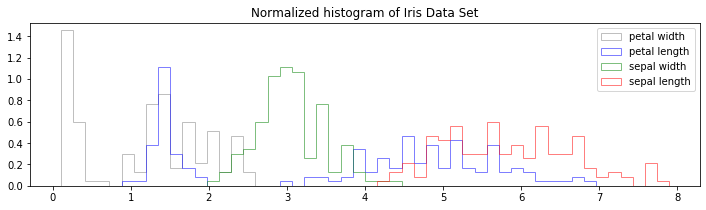

In [20]:
plt.figure(figsize=(12,3))#create a new figure    
n, bins, patches = plt.hist(data, num_bins, density=1,histtype="step", color=colors, alpha=0.5, label=names)
plt.title("Normalized histogram of Iris Data Set")
plt.legend()
plt.show()

**4.Create a boxplot over the four dimensions**

No handles with labels found to put in legend.
/Users/torbenschnuchel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


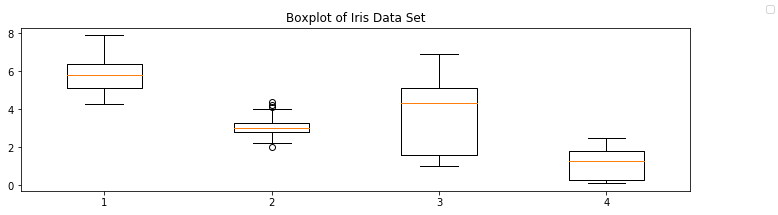

In [25]:
fig = plt.figure(figsize=(12,3))#create a new figure    
plt.boxplot(data)
plt.title("Boxplot of Iris Data Set")
fig.legend()
fig.show()

**5. Implement a function that creates a scatter plot matrix, where the main diagonal are either boxplots or histograms and classes.**

*For all of the above plots encode the class information with different colors*

In [26]:
def sm(data,labels, classes=None, colors=None,num_bins=50):
    row,column = data.shape
    fig,axes = plt.subplots(column,column,figsize=(10,4))
    fig.tight_layout()
    for i in range(column):
       for j in range(column):
            if i==j:            
                n, bins, patches = axes[i,j].hist(data[:,i], num_bins, normed=1, alpha=0.5)
            else:
                if classes is not None and colors is not None:
                    for idx,c in enumerate(colors):
                        mask = classes== (idx+1)
                        axes[i,j].plot(data[mask,i],data[mask,j],".",color=colors[idx],label = "%s vs. %s"%(labels[i],labels[j]))
                else:
                    axes[i,j].plot(data[:,i],data[:,j],".",label = "%s vs. %s"%(labels[i],labels[j]))
            

/Users/torbenschnuchel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


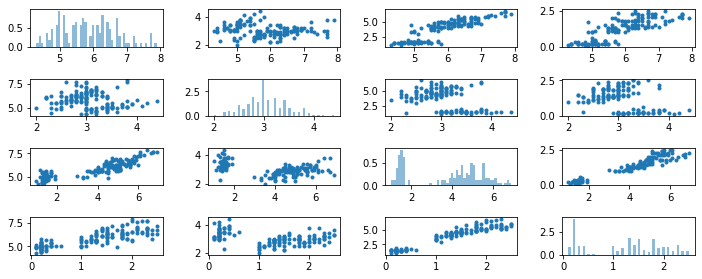

In [27]:
sm(data,names)

/Users/torbenschnuchel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


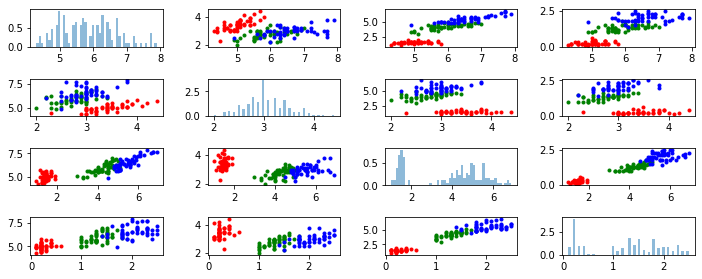

In [28]:
sm(data,names,classes,["red","green","blue"])